# ThetaScan

## 0. Set-up

In [1]:
import sys
import os
import numpy as np

In [2]:
sys.path.append(os.path.abspath("../package"))


In [3]:
import ThetaScan
from ThetaScan.utilities import *
from ThetaScan.ThetaScan import *

In [4]:
import seaborn as sns
sns.set_theme(style="whitegrid")

## 1. Generate synthetic data

In [5]:
N = 3 #number of traces to generate
ts_len = 1000 #length of the traces
ts_types=["stationary", "trending", "periodic"]
data, names = generate_ts_dataset(N, ts_len, ts_types)

Generating stationary trace centered at 713...
Generating trending trace with slope 0.77 and intercept 109...
Generating periodic trace with period 37


Select one example trace of each type and plot it 

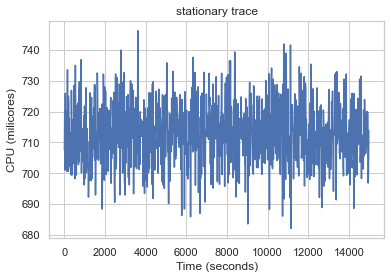

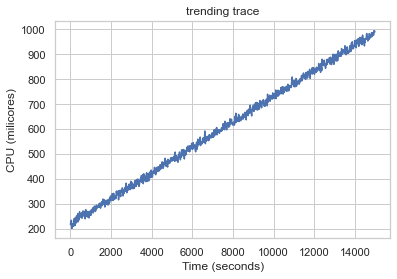

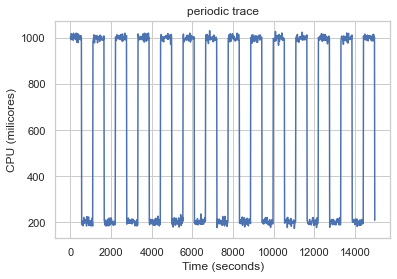

In [6]:
examples = {}
for ts_type in ts_types:
    examples[ts_type] = data[random.choice([i for i, e in enumerate(names) if e == ts_type])]
    
for key in examples:
    plot_trace(examples[key], key + " trace", "CPU (milicores)", trace_legend="CPU Usage")

## 2. Recommend limits

### 2.1 Fixed window 5 minutes

Compute limits with a fixed time window of 5 minutes

In [7]:
TS = ThetaScan()

The recommend function computes the ThetaScan requests. It is possible to control the window size (the fixed step that we provision) and the observation window, that modulates how much history we take into consideration for computing recommendations. In this example, we take as window size 20 time steps because it is equivalent to 5 minutes in our data as we have one data point every 15 seconds.

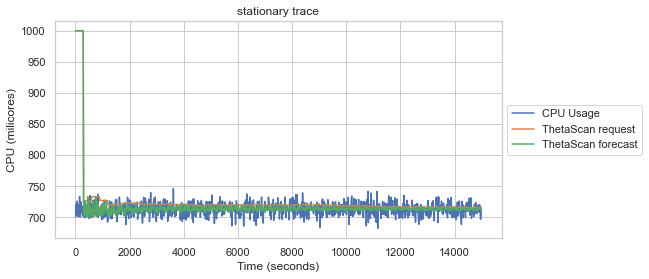

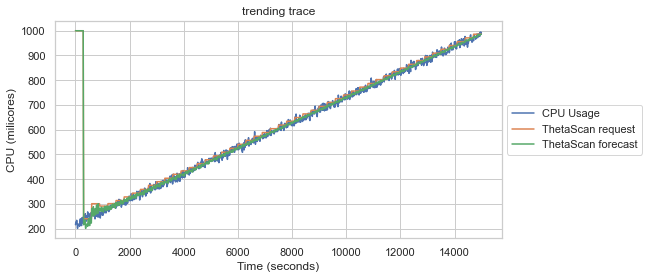

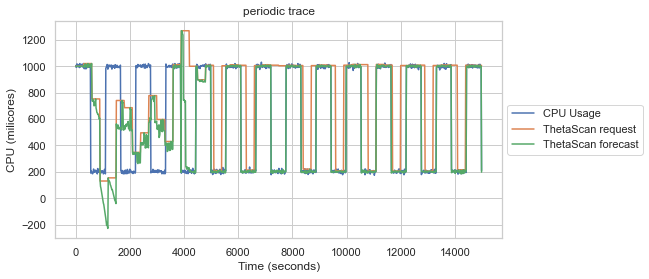

In [8]:
for i, trace in enumerate(data):
    forecasted_request, forecasted_predicted = TS.recommend(trace,window_size=20, observation_window = ts_len)
    plot_recommendations(trace, forecasted_predicted, forecasted_request, names[i] + " trace")


### 2.1 Dynamic window

Compute limits with a dynamic time window dependent on the detected behaviour

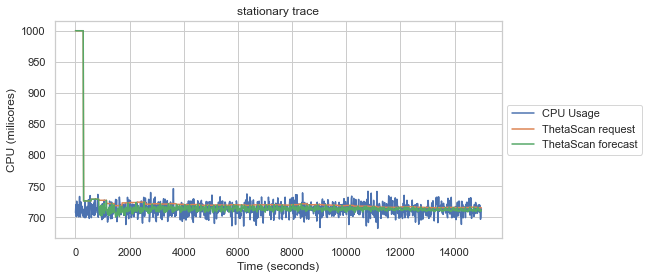

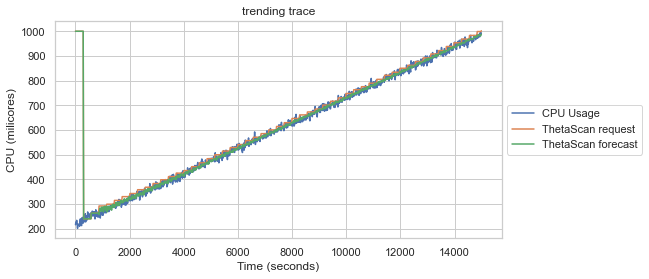

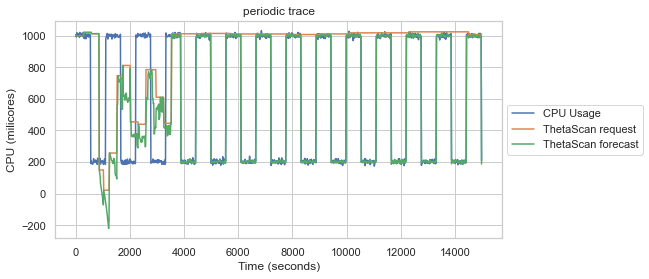

In [9]:
for i, trace in enumerate(data):
    forecasted_request, forecasted_predicted = TS.dynamic_recommend(trace)
    plot_recommendations(trace, forecasted_predicted, forecasted_request, names[i] + " trace")

